In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
mnist_data = pd.read_csv('/content/mnist_784_csv.csv')  # Replace with the actual path

# Extract features (pixels) and labels
X = mnist_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = mnist_data.iloc[:, 0].values

# Build a simple sparse autoencoder
encoding_dim = 32  # Adjust the encoding dimension as needed

input_img = tf.keras.Input(shape=(784,))

# Encoder
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1e-4))(input_img)

# Decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Encoder model (for extracting encoded representations)
encoder = models.Model(input_img, encoded)

# Get encoded representations for the entire dataset
encoded_images = encoder.predict(X)

# Print encoded representations (sparsity can be observed)
print("Encoded Representations:")
print(encoded_images)

# Visualize some reconstructed images
decoded_images = autoencoder.predict(X)

# ... (you can add code to visualize the original, encoded, and reconstructed images)


Epoch 1/50
8/8 [==============================] - 2s 64ms/step - loss: 0.6845 - val_loss: nan
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.6239 - val_loss: nan
Epoch 3/50
8/8 [==============================] - 0s 22ms/step - loss: 0.5024 - val_loss: nan
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 0.3855 - val_loss: nan
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.3236 - val_loss: nan
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.3004 - val_loss: nan
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.2901 - val_loss: nan
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.2835 - val_loss: nan
Epoch 9/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2779 - val_loss: nan
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.2723 - val_loss: nan
Epoch 11/50
8/8 [==============================] - 0s 21ms/

1/1 [==============================] - 0s 29ms/step


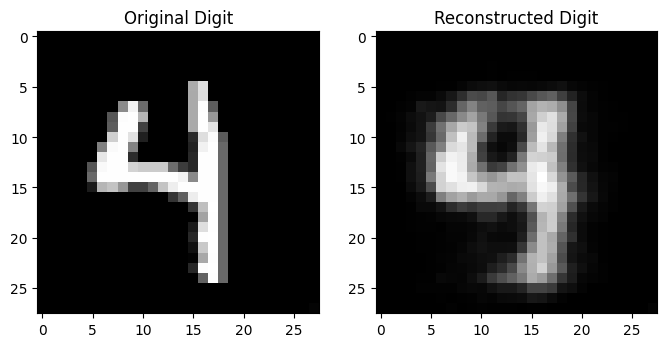

Encoded Representation:
[[2.2384953  0.89789367 1.4476289  2.672629   4.609091   2.0753462
  1.65847    1.7510641  9.211636   3.0080614  0.         3.9205022
  0.         4.0599923  0.         3.3749044  4.295763   1.2767668
  1.4190224  3.5646966  3.2671518  0.24433294 3.1649141  2.165933
  0.         1.0636791  1.5738459  2.1252682  4.538624   0.23765978
  1.514353   3.1681275 ]]
Predicted Digit: 8


In [2]:
import matplotlib.pyplot as plt
import random

# Choose a random digit from the dataset
random_index = random.randint(0, len(X) - 1)
input_digit = X[random_index]

# Encode the digit using the trained encoder
encoded_representation = encoder.predict(np.reshape(input_digit, (1, 784)))

# Decode the encoded representation to reconstruct the digit
decoded_digit = autoencoder.predict(np.reshape(input_digit, (1, 784)))

# Reshape the arrays for visualization
input_digit = np.reshape(input_digit, (28, 28))
decoded_digit = np.reshape(decoded_digit, (28, 28))

# Plot the original and reconstructed digits
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(input_digit, cmap='gray')
plt.title('Original Digit')
plt.subplot(1, 2, 2)
plt.imshow(decoded_digit, cmap='gray')
plt.title('Reconstructed Digit')
plt.show()

# Print the encoded representation
print("Encoded Representation:")
print(encoded_representation)

# Predict the digit using the encoded representation
predicted_digit = np.argmax(encoded_representation)
print(f"Predicted Digit: {predicted_digit}")
